# Анализ резюме: Система HR-рекомендаций. (INSPECTRUM CLINIC)

## Постановка задачи

**Цель:** Разработать прототип системы, реализующей функцию рекомендательной системы для HR-специалиста.

**Принцип работы:**
Система должна помогать HR-специалисту вынести решение о том, подходит или не подходит человек на рассматриваемую должность.
В датасете целевым столбцом для предсказания является столбец под названием “Подходит - да/нет”. 
Результатом работы обученной нейросети должно служить дополнение датасета столбцом под названием “оценка резюме”, где должно быть представлено процентное распределение вероятностей между классами “подходит” и “не подходит”. Например: "подходит 95% / не подходит 5%".
Система должна иметь возможность дообучаться на новых данных, предоставленных Заказчиком.

**Требования к тестированию, метрикам качества:**
Оценка результатов работы системы производится Заказчиком на тестовом наборе Заказчика. Метрика точности - точность рекомендации должна быть не ниже 95%.

## Анализ входных данных
Проанализируем входные данные, подгрузив исходный датасет.

In [1212]:
# Импорт необходимых библиотек

import pandas as pd
import numpy as np
import re

In [1213]:
# Считаем файл с данными

data = pd.read_excel('/Users/elenasokolova/Downloads/ДатаСет_Оценка_резюме_581_резюме_3_0_без_оценки.xlsx');
data.head(15)


,Unnamed: 0,Дата отклика,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,0,2023-02-23 00:00:00,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,Маркетинговые исследования\nИсследование рынка...,NaN,Анализ рынка\nУправление проектами\nProduct Ma...,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,1,2023-01-11 00:00:00,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,Участие в команде роста\nВ2В\n\nЗадачи:\n- Раз...,NaN,Самомотивация\nТаймменеджмент\nКреативность\nЧ...,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2,2023-02-27 00:00:00,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,,Запуск бренда и производства игристого кваса D...,"Чем бы я ни занимался с 2014 года, когда решил...",Продвижение бренда\nПланирование маркетинговых...,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,3,2023-01-11 00:00:00,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),1. Исследование рынка\n2. Определение целевой ...,"Я проактивный, коммуникабельный, позитивный, д...",Управление проектами\nОрганизаторские навыки\n...,"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,4,2023-01-11 00:00:00,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,Переговоры со стейкхолдером\n- Составление ТЗ...,Набрал кучу опыта и хочу с ним найти классную ...,Управление персоналом\nЗаключение договоров\nА...,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да
5,5,2023-02-25 00:00:00,"Женщина, 31 год, родилась 26 июня 1991",120 000 руб.,Product manager в Growth Hacking команду,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 11 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,NaN,NaN,NaN,"Высшее, 2014, Университет Российской академии ...",23 февраля 2023 в 16:46,да
6,6,2023-02-26 00:00:00,"Женщина, 36 лет, родилась 20 марта 1987",100 000 руб.,Директор медицинской клиники,"Уфа, Не готова к переезду, готова к редким ком...","полная занятость, частичная занятость, проектн...","полный день, гибкий график",Опыт работы —13 лет 9 месяцев,"ОАО ""Фармстандарт-УфаВИТА""",Начальник участка инъекционных препаратов,"Республика Башкортостан, Фармацевтическая прод...",NaN,Работа в команде\nОбучение персонала\nУправлен...,"Высшее, 2009, Башкирский государственный аграр...",9 марта 2023 в 22:27,да
7,7,2023-01-26 00:00:00,"Женщина, 24 года, родилась 27 апреля 1998",30 000 руб.,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —5 лет,Tiqum,Контент-менеджер,"Работа с сайтами: выкла

In [1214]:
# Проанализируем данные на наличие пропусков

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Unnamed: 0                                  579 non-null    int64 
 1   Дата отклика                                579 non-null    object
 2   Пол, возраст                                579 non-null    object
 3   ЗП                                          579 non-null    object
 4   Ищет работу на должность                    579 non-null    object
 5   Город                                       579 non-null    object
 6   Занятость                                   579 non-null    object
 7   График                                      579 non-null    object
 8   Опыт ()                                     579 non-null    object
 9   Последнее/нынешное место работы             579 non-null    object
 10  Последняя/нынешняя должнос

Всего в датасете 579 строк. Целевой признак 'Подходит - да/нет' определен только дл 500 из них. Для признаков 'Выполняемые задачи на прошлых местах работ', 'Обо мне' и 'Ключевые навыки' есть строки с незаполненными данными, для других столбцов пропусков нет. 


In [833]:
# Выведем количество строк в датасете по каждой из вакансий, для которых не определен целевой показатель
data_by_position = data[data['Подходит - да/нет'].isnull()]['Ищет работу на должность'].value_counts()
print(data_by_position)

Product manager в Growth Hacking команду              21
Growth Product Manager                                14
Project manager                                       13
Product Manager в команду HR                          12
Product Manager в команду Финансового департамента    11
Product Marketing Manager в Growth Hacking команду     8
Name: Ищет работу на должность, dtype: int64


In [834]:
# Вывкдем информацию о количестве уникальных должностей, на которые подбирались кандидаты и количество позитивных / негативных откликов на них.

res = data[['Ищет работу на должность', 'Подходит - да/нет']]
res = res.groupby(['Ищет работу на должность', 'Подходит - да/нет'])['Ищет работу на должность'].count()
print(res.head(30))

Ищет работу на должность                            Подходит - да/нет
Growth Product Manager                              да                     5
                                                    нет                  179
HR-специалист                                       да                     4
                                                    нет                  111
Product Manager в команду HR                        нет                   13
Product Manager в команду Финансового департамента  нет                   25
Product Marketing Manager в Growth Hacking команду  нет                    6
Product manager в Growth Hacking команду            да                     1
                                                    нет                   55
Project manager                                     нет                    8
Директор медицинской клиники                        да                     1
                                                    нет                   92
Name: 

При первичном анализе видно, что данные обладают рядом проблем, а именно:
- не по всем должностям есть примеры кандидатов с положительным вердиктом
- не по всем строкам заполнен целевой показатель
- данные крайне не сбалансированы (11 положительных примеров (2%) против 489 отрицательных (98%))
- нет описания самой вакансии для понимания, а кого именно ищет компания на определенную должность.

По указанным выше причинам существует риск, что модель не будет обладать требуемым качеством предсказания.

## Подготовка данных для построения модели

Чтобы оставить для обучения данные только по должностям (HR-специалист, Growth Product Manager), для которых есть приемлемое количество записей обоих категорий (да/нет), можно раскаомментировать следующую ячейку кода. По умолчанию будем обучать модель на всех доступных данных.

In [714]:

#data = data.loc[data['Ищет работу на должность'].isin(['HR-специалист','Growth Product Manager'])]

In [835]:
# проверим данные на наличие пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Unnamed: 0                                  579 non-null    int64 
 1   Дата отклика                                579 non-null    object
 2   Пол, возраст                                579 non-null    object
 3   ЗП                                          579 non-null    object
 4   Ищет работу на должность                    579 non-null    object
 5   Город                                       579 non-null    object
 6   Занятость                                   579 non-null    object
 7   График                                      579 non-null    object
 8   Опыт ()                                     579 non-null    object
 9   Последнее/нынешное место работы             579 non-null    object
 10  Последняя/нынешняя должнос

Для 79 строк не определен целевой параметр, выделим их в отдельное подмножество для дальнейшей проверки модели и удалим из обучающего датасета.

In [836]:
final_test_data = data.loc[data['Подходит - да/нет'].isnull()]

In [837]:
final_test_data.head(5)

,Unnamed: 0,Дата отклика,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
500,500,2023-02-02 00:00:00,"Женщина, 34 года, родилась 4 марта 1988",90 000 руб.,Product Manager в команду Финансового департам...,"Уфа, Не готова к переезду, готова к редким ком...",полная занятость,полный день,Опыт работы —16 лет 7 месяцев,Оптовая торговля,Главный бухгалтер,Полное ведение бухгалтерского и налогового\nуч...,NaN,NaN,"Высшее, 2010, Уфимский государственный авиацио...",2 февраля 2023 в 08:45,NaN
501,501,2023-02-07 00:00:00,"Женщина, 37 лет, родилась 3 января 1986",не указана,Project manager,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —10 лет 2 месяца,PLANETA,Руководитель отдела персонала,Организация массового набора соискателей на ва...,NaN,Обучаемость,"Высшее, 2016, Башкирская академия государствен...",14 февраля 2023 в 19:11,NaN
502,502,2023-03-10 00:00:00,Мужчина,35 000 руб.,Project manager,"Уфа, Готов к переезду, готов к редким командир...",полная занятость,"полный день, сменный график, гибкий график",Опыт работы —3 года 5 месяцев,Восток,Упаковщик,Упаковка спичекСборка товара выдача и загрузка...,Без вредных превычек,Вежливость\nСтрессоустойчивость\nВнимательност...,"Неоконченное высшее, 2021, Башкирский государс...",10 марта 2023 в 09:15,NaN
503,503,2023-02-16 00:00:00,"Женщина, 32 года, родилась 5 марта 1990",70 000 руб.,Project manager,"Уфа, Не готова к переезду, готова к командировкам",полная занятость,полный день,Опыт работы —9 лет 6 месяцев,Почта Банк,Тренинг-менеджер,Проведение тренингов по продажам для сотрудник...,"""Горю"" своей работой. Эмоционально активна, пр...",Обучение персонала\nТренинги\nОбучение и разви...,"Неоконченное высшее, 2010, Башкирский институт...",7 сентября 2021 в 08:19,NaN
504,504,2023-03-05 00:00:00,"Женщина, 25 лет, родилась 23 июня 1997",30 000 руб.,Project manager,"Уфа, Готова к переезду, готова к редким команд...",полная занятость,полный день,Опыт работы —4 года 7 месяцев,РОО СОП ШПВТ РБ,Администратор,Составление плана-графика для разработки сайта...,NaN,Управление проектами\nУправление командой\nПос...,"Высшее, 2019, \nФилиал Башкирского государстве...",5 марта 2023 в 12:24,NaN


----------------------------------------

### Отделение текстовых данных от категориальных

Попробуем обучить модели отдельно на текстовых данных по кандидату (это столбцы 'Обо мне' и 'Выполняемые задачи на прошлых местах работ') и отдельно на категориальных.

Для кодирования текстовых данных используем модель word2vec.

In [839]:
# выделим столбцы с текстовыми данными в отдельный датасет text_features
text_features = data[['Обо мне', 'Выполняемые задачи на прошлых местах работ', 'Подходит - да/нет']]
# заполним пропуски в данных пустой строкой и заменим переносы строк на пробелы
text_features = text_features.fillna('')
text_features = text_features.replace(r'\n',' ', regex=True) 

count_about = text_features['Обо мне'].str.split().apply(len).value_counts()
count_tasks = text_features['Выполняемые задачи на прошлых местах работ'].str.split().apply(len).value_counts()

# создадим новый столбец, куда соединим данные из двух других текстовых столбцов
text_features['text'] = text_features['Обо мне'] + ' '+ text_features['Выполняемые задачи на прошлых местах работ']

In [840]:
# все текстовые данные соедним в общий корпус текста для обучения модели word2vec и формирования словаря
corpus = text_features['text'].values

In [841]:
# Добавим библиотеки для создания модели нейронной сети и оценки ее качества
import tensorflow as tf

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Слой задания активационной функции 
from tensorflow.keras.layers import Activation

# Утилиты предобработки данных
from tensorflow.keras import utils

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split

# Рисование графиков
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.utils import class_weight

In [842]:
from gensim.models import Word2Vec

# пусть размер векторного пространства будет равен 100
Embedding_dimensions = 100

# Проинициализируем обучающий набор данных для модели Word2Vec
Word2vec_train_data = list(map(lambda x: x.split(), corpus))

In [843]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer 

# создадим стеммер для русского языка, который будет оставлять от слов только семантически значимые части
stemmer = SnowballStemmer("russian") 


# разобьем наш корпус текста на предложения, приведя к нижнему регистру
sentences = nltk.sent_tokenize(str(corpus).lower())


# разобьем предложения на слова, исключим стоп-слова русского языка (предлоги, союзы и пр.) и знаки препинания
stop_words = set(stopwords.words('russian'))
word_tokenized_data = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    words = [stemmer.stem(word) for word in words if word.lower() not in stop_words and word not in string.punctuation]
    word_tokenized_data.append(words)

# создадия Word2Vec модель и проинициализируем словарь
word2vec_model = Word2Vec(word_tokenized_data, vector_size=Embedding_dimensions, workers=8, min_count=5)
vocabulary = list(word2vec_model.wv.key_to_index.keys())


In [844]:
# просмотрим состав словаря по частотности
print(word2vec_model.wv.key_to_index,)

{'работ': 0, 'разработк': 1, 'продукт': 2, 'контрол': 3, '•': 4, 'компан': 5, 'проект': 6, 'продаж': 7, 'организац': 8, 'проведен': 9, 'анализ': 10, 'команд': 11, 'клиент': 12, 'управлен': 13, 'нов': 14, 'веден': 15, 'создан': 16, '—': 17, 'отдел': 18, 'подготовк': 19, 'задач': 20, 'составлен': 21, 'развит': 22, 'сотрудник': 23, "''": 24, 'месяц': 25, '``': 26, 'процесс': 27, 'отчетн': 28, 'формирован': 29, 'обучен': 30, 'выполнен': 31, 'сайт': 32, 'маркетингов': 33, 'год': 34, 'деятельн': 35, 'систем': 36, 'рынк': 37, 'персона': 38, 'стратег': 39, 'поиск': 40, 'план': 41, 'взаимодейств': 42, 'продвижен': 43, 'учет': 44, 'внедрен': 45, 'сет': 46, 'участ': 47, 'маркетинг': 48, 'договор': 49, 'результат': 50, 'аналитик': 51, 'предприят': 52, 'решен': 53, 'обеспечен': 54, 'гипотез': 55, 'рекламн': 56, '2': 57, 'планирован': 58, '«': 59, 'мероприят': 60, 'документац': 61, 'подбор': 62, 'пользовател': 63, 'работа': 64, 'дан': 65, 'услуг': 66, 'бизнес': 67, 'эффективн': 68, '»': 69, 'исследо

In [845]:
# закодируем исходные данные в числовой вектор размера 200
target_size = 200

def encode_text(text, vocabulary, word2vec_model):
    tokens = text.split()

    embeddings = []
    for token in tokens:
        if stemmer.stem(token).lower() in vocabulary:
            embeddings.append(np.mean(word2vec_model.wv[stemmer.stem(token).lower()]))
            if len(embeddings) == target_size:
                return embeddings
    if len(embeddings) == 0:
        return np.zeros(word2vec_model.vector_size)
    elif len(embeddings) < target_size:
        # если в текстовом описании было меньше 200 слов - дополняем до 200 нулями
        padding = np.zeros(target_size - len(embeddings))
        padded_array = np.concatenate([embeddings, padding])
        return padded_array
    elif len(embeddings) > target_size:
        # если текст длиннее 200 слов - оставляем только первые 200 из них
        truncated_array = embeddings[:target_size]
        return truncated_array
    else:
        return embeddings

# применяем функцию к столбцу с текстом, закодированные данные кладем в новый столбец 'embedding'
text_features['embedding'] = text_features['text'].apply(lambda x: encode_text(x.lower(), vocabulary, word2vec_model))




In [846]:
# удаляем столбцы с текстом, оставив только столбцы с закодированными данными
text_features_drop = text_features.drop([ 'Обо мне', 'Выполняемые задачи на прошлых местах работ', 'text'],  axis=1).columns
text_features = text_features[text_features_drop]

In [847]:
# вектор из 200 значений распрелелим по отдельным столбцам и удалим ненужный столбец
for i in range(target_size):
    text_features[f'column{i+1}'] =  text_features['embedding'].apply(lambda x: x[i] if i < len(x) else None)

/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/3111145752.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  text_features[f'column{i+1}'] =  text_features['embedding'].apply(lambda x: x[i] if i < len(x) else None)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/3111145752.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  text_features[f'column{i+1}'] =  text_features['embedding'].apply(lambda x: x[i] if i < len(x) else None)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/3

In [848]:
# удалим более не нужный столбец 'embedding'
text_features_drop = text_features.drop(['embedding'],  axis=1).columns
text_features = text_features[text_features_drop]

In [849]:
# сохраним перед удалением строки в том числе с незаполненным целевым показателем
final_test_data_text  = text_features


In [850]:

# для того, чтобы удалить строки с незаполенным целевым показателем проставим в эти строки NaN
text_features['Подходит - да/нет'] = text_features['Подходит - да/нет'].replace(r'^\s*$', np.nan, regex=True)
text_features = text_features.dropna(subset=['Подходит - да/нет'])


In [851]:
text_features['Подходит - да/нет'].value_counts()

нет    489
да      11
Name: Подходит - да/нет, dtype: int64

In [852]:
text_features = text_features.fillna(0)

In [853]:
# закодируем целевой признак: вместо да/нет проставим 1/0
text_features['Подходит - да/нет'] = text_features['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)

In [854]:

from sklearn.model_selection import train_test_split

X_text = text_features.drop('Подходит - да/нет', axis=1)
y_text = text_features['Подходит - да/нет']


In [855]:
# Выделим обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_text, y_text, test_size=0.2, random_state=42, stratify=y_text)

# Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (400, 200) (400,)
Test: (100, 200) (100,)


In [856]:
# создадим модель
model = Sequential()


model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))    
model.add(Dense(1, activation='sigmoid'))


# поскольку данные сильно несбалансированы по категориям? определим веса для каждой из категорий
class_weights = class_weight.compute_class_weight(class_weight ='balanced', classes = np.unique(y_train), y = y_train)

weight = {i : class_weights[i] for i in range(2)}

# скомпилируем модель
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[ tf.keras.metrics.FalseNegatives(), 'accuracy'])

# и выведем ее аржитектуру
model.summary()


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 128)               25728     
                                                                 
 dense_133 (Dense)           (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_134 (Dense)           (None, 1)                 65        
                                                                 
Total params: 34049 (133.00 KB)
Trainable params: 34049 (133.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [857]:
# Провердем обучение нейронной сети
history = model.fit(X_train,     # Обучающая выборка параметров
          y_train,               # Обучающая выборка меток класса
          batch_size=32,          # Размер батча (пакета)
          epochs=150,            # Количество эпох обучения
          validation_split=0.2,  # Доля проверочной выборки
          verbose=1,               # Отображение хода обучения
          class_weight = weight)   # Использование разных весов для разных категорий        


Epoch 1/150
10/10 [==============================] - 0s 10ms/step - loss: 0.7791 - false_negatives_36: 7.0000 - accuracy: 0.4187 - val_loss: 0.6884 - val_false_negatives_36: 0.0000e+00 - val_accuracy: 0.9750
Epoch 2/150
10/10 [==============================] - 0s 2ms/step - loss: 0.7727 - false_negatives_36: 3.0000 - accuracy: 0.7906 - val_loss: 0.6887 - val_false_negatives_36: 0.0000e+00 - val_accuracy: 0.6125
Epoch 3/150
10/10 [==============================] - 0s 3ms/step - loss: 0.7680 - false_negatives_36: 0.0000e+00 - accuracy: 0.6531 - val_loss: 0.6904 - val_false_negatives_36: 0.0000e+00 - val_accuracy: 0.5500
Epoch 4/150
10/10 [==============================] - 0s 3ms/step - loss: 0.7627 - false_negatives_36: 0.0000e+00 - accuracy: 0.6219 - val_loss: 0.6913 - val_false_negatives_36: 0.0000e+00 - val_accuracy: 0.4625
Epoch 5/150
10/10 [==============================] - 0s 3ms/step - loss: 0.7539 - false_negatives_36: 0.0000e+00 - accuracy: 0.7594 - val_loss: 0.6802 - val_false_

In [858]:

# оценим модель на тестовых данных
result = model.evaluate(X_test, y_test)
loss = result[0]
false_negatives_3 =  result[1]
accuracy =  result[2]  

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

4/4 [==============================] - 0s 982us/step - loss: 0.5071 - false_negatives_36: 2.0000 - accuracy: 0.9200
Test Loss: 0.5071
Test Accuracy: 0.9200


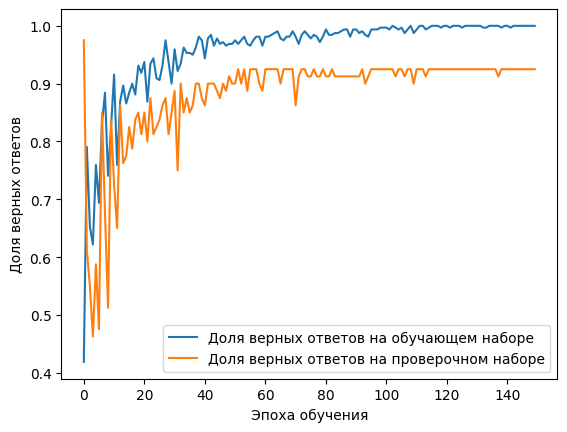

In [859]:
import matplotlib.pyplot as plt

# Визуализируем изменение точности модели в ходе процесса обучения на графике

# Визуализация точности на обучающей выборке
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
# Визуализация точности на тестовой выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')


# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

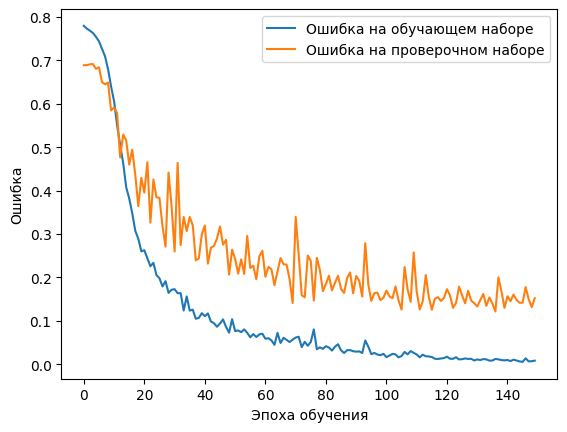

In [860]:
# визуализируем изменение ошибки по ходу обучения
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')


plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()
plt.show()

In [861]:
# Предскажем значения целевого параметра получившейся моделью для обучающей выборки
y_predict_train = model.predict(X_train)

# Предскажем значения целевого параметра получившейся моделью для тестовой выборки
y_predict_test = model.predict(X_test)

4/4 [==============================] - 0s 635us/step


Метрики для тренировочной выборки:
Accuracy: 0.98
Precision: 0.60
Recall: 1.00
F1 score: 0.75
Метрики для тестовой выборки:
Accuracy: 0.92
Precision: 0.00
Recall: 0.00
F1 score: 0.00


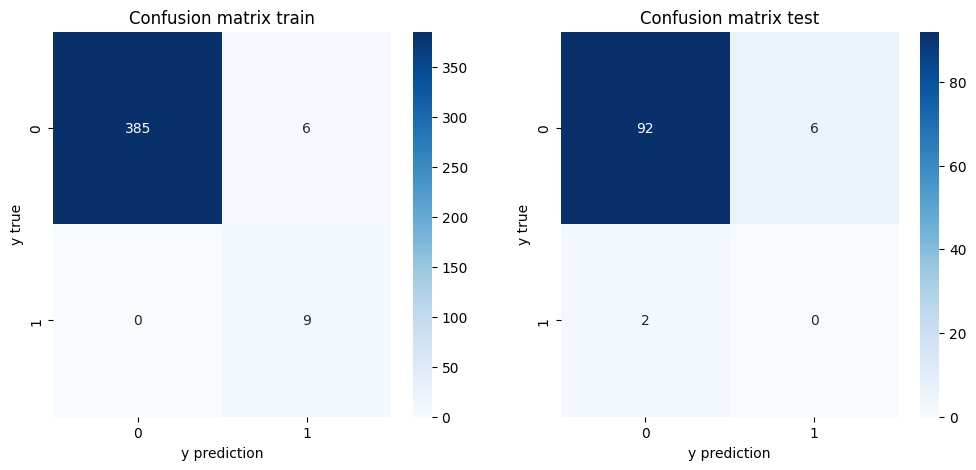

In [862]:
from sklearn import metrics

confusion_matrix_train = metrics.confusion_matrix(y_train, y_predict_train.round())
confusion_matrix_test = metrics.confusion_matrix(y_test, y_predict_test.round())

import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix_test, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix test')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true')
sns.heatmap(confusion_matrix_train, annot=True, fmt='', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion matrix train')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')

# Рассчитаем и выведем числовые метрики
print("Метрики для тренировочной выборки:")
# Метрики для тренировочной выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_predict_train.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_train, y_predict_train.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_train, y_predict_train.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_predict_train.round())))

print("Метрики для тестовой выборки:")
# Метрики для тестовой выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_predict_test.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_predict_test.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_predict_test.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_test, y_predict_test.round())))

По confusion matrix видно, что
- из-за несбалансированного датасета сеть видела мало положительных примеров и чаще выносит отрицательный вердикт
- сеть слабо уловила корреляцию между входными и выходными данными: все данные с положительным вердиктом из тестовой выборки сеть определа неправильно
- из-за наличия разных весовых коэффициентов для разных категорий, сеть так же дала некоторое количество ложноположительных результатов

--------------------------------------

### Построим модель на категориальных данных

Необходиме преобразовать данные во всех оставшихся столбцах к числовым, для только чтобы их можно было использовать для обучения модели.

In [863]:
# убираем столбцы, не влияющие на качество обучения модели

features = data.drop(['Дата отклика', 'Обновление резюме','Unnamed: 0', 'Обо мне', 'Выполняемые задачи на прошлых местах работ'],  axis=1).columns
data_clean = data[features]

Создадим функции для преобразования данных.

In [864]:
# создадим функцию по извлечению возраста из колонки 'Пол, возраст'

def extract_age(arg):
    year_key_words = ['год', 'лет', 'года']
    args_splited = arg.split(',')[:2]
    if len(args_splited) > 1:
        year = int(re.findall(r'\d+', args_splited[1])[0])
    else:
        year = 0
    return year

# и функцию по извлечению пола

def extract_gender(arg):
    if 'женщина' in arg.lower():
        return 0
    elif 'мужчина' in arg.lower():
        return 1
    else:
        return ""


# создадим две новые колонки для пола и возраста

data_clean['Пол'] = data_clean['Пол, возраст'].apply(extract_gender)
data_clean['Возраст'] = data_clean['Пол, возраст'].apply(extract_age)

# удалим ненужный столбец

data_clean.drop(['Пол, возраст'], axis=1, inplace=True)

/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/1691710437.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Пол'] = data_clean['Пол, возраст'].apply(extract_gender)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/1691710437.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Возраст'] = data_clean['Пол, возраст'].apply(extract_age)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/1691710437.py:30: SettingWithCopyWarning: 
A value

In [865]:
# создадим функцию по выделению уровня образования

def get_education_level(arg):
    education_key_words = ['неоконченноевысшее', 'среднееспециальное', 'среднее', 'высшее', 'бакалавр', 'магистр', 'кандидатнаук', 'докторнаук']
    arg = ''.join(arg.split(' ')[:3])
    for i in range(len(education_key_words)):
      if education_key_words[i] in arg.lower():
        return education_key_words[i]
    return ""

# создадим новый столбец для уровня образования и удалим старый столбец

data_clean['Образование'] = data_clean['Образование и ВУЗ'].apply(get_education_level)
data_clean.drop(['Образование и ВУЗ'], axis=1, inplace=True)

data_clean['Образование'].value_counts()

/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/2936332594.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Образование'] = data_clean['Образование и ВУЗ'].apply(get_education_level)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/2936332594.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(['Образование и ВУЗ'], axis=1, inplace=True)


высшее                383
среднееспециальное     58
бакалавр               43
магистр                40
неоконченноевысшее     33
среднее                16
кандидатнаук            5
докторнаук              1
Name: Образование, dtype: int64

In [866]:
# определим функцию для пересчета опыта работы в месяцы

def get_experience(arg):
    month_key_words = ['месяц', 'месяцев', 'месяца']
    year_key_words = ['год', 'лет', 'года']

    if pd.isnull(arg) or arg == 'Не указано':
        return 0

    arg = arg.replace("—", '')
    args_splited = arg.split(' ')[:6]
    month = 0
    year = 0
    for i in range(len(args_splited)):
        if args_splited[i] in month_key_words:
            month = args_splited[i-1]
        if args_splited[i] in year_key_words:
            year = args_splited[i-1]
    return int(year)*12 + int(month)

# создадим новый столбец с опытом работы в месяцах
data_clean['Опыт работы (месяц)'] = data_clean['Опыт ()'].apply(get_experience)

# для информации посчитаем медианый опыт работы (в месяцах)
print(data_clean['Опыт работы (месяц)'].median())

# удалим ненужный столбнц
data_clean.drop(['Опыт ()'], axis=1, inplace=True)

101.0


/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/663365984.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Опыт работы (месяц)'] = data_clean['Опыт ()'].apply(get_experience)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/663365984.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(['Опыт ()'], axis=1, inplace=True)


In [867]:
# определим функции для выделения каждого типа занятости у кандидата

def is_full_employment(arg):
    if 'полная занятость' in arg.lower():
        return 1
    else:
        return 0

def is_part_employment(arg):
    if 'частичная занятость' in arg.lower():
        return 1
    else:
        return 0

def is_project(arg):
    if 'проектная работа' in arg.lower():
        return 1
    else:
        return 0

def is_volunteer(arg):
    if 'волонтёрство' in arg.lower() or 'волонтерство' in arg.lower():
        return 1
    else:
        return 0

def is_intern(arg):
    if 'стажировка' in arg.lower():
        return 1
    else:
        return 0

# опеделим функции для выделения предпочитаемого графика


def is_full_time(arg):
    if 'полный день' in arg.lower():
        return 1
    else:
        return 0

def is_shift_schedule(arg):
    if 'сменный график' in arg.lower():
        return 1
    else:
        return 0

def is_flexible_schedule(arg):
    if 'гибкий график' in arg.lower():
        return 1
    else:
        return 0

def is_remote_work(arg):
    if 'удалённая работа' in arg.lower() or 'удаленная работа' in arg.lower():
        return 1
    else:
        return 0

def is_shift_method(arg):
    if 'вахтовый метод' in arg.lower():
        return 1
    else:
        return 0

# для каждого из возможных типов занятости создадим свой столбец и проставим 1, если кандидат рассматривает такой вариант и 0, если нет
data_clean['полная занятость'] = data_clean['Занятость'].apply(is_full_employment)
data_clean['частичная занятость'] = data_clean['Занятость'].apply(is_part_employment)
data_clean['проектная работа'] = data_clean['Занятость'].apply(is_project)
data_clean['волонтёрство'] = data_clean['Занятость'].apply(is_volunteer)
data_clean['стажировка'] = data_clean['Занятость'].apply(is_intern)


# для каждого из возможных типов рабочего графика создадим свой столбец и проставим 1, если кандидат рассматривает такой вариант и 0, если нет
data_clean['полный день'] = data_clean['График'].apply(is_full_time)
data_clean['сменный график'] = data_clean['График'].apply(is_shift_schedule)
data_clean['гибкий график'] = data_clean['График'].apply(is_flexible_schedule)
data_clean['удалённая работа'] = data_clean['График'].apply(is_remote_work)
data_clean['вахтовый метод'] = data_clean['График'].apply(is_shift_method)

# удалим старые столбцы
data_clean.drop(['Занятость'], axis=1, inplace=True)
data_clean.drop(['График'], axis=1, inplace=True)


/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/472974710.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['полная занятость'] = data_clean['Занятость'].apply(is_full_employment)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/472974710.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['частичная занятость'] = data_clean['Занятость'].apply(is_part_employment)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/472974710.py:69: Setti

In [868]:
# создадим функцию для определения города соискателя

def get_city(arg):
    arg = str(arg).lstrip()
    city = arg.split(' ')[0]

    return city.replace(',','')

# создадим функцию для определения, готов ли соискатель к релокации
def get_ready_for_relocation(arg):
    arg = str(arg).lstrip()
    arr = arg.split(',')


    if len(arr) > 3:
        ready_for_relocation = arr[2].strip()
    else:
        ready_for_relocation = arr[1].strip()


    if 'не' in ready_for_relocation.lower():
        return 0
    else:
        return 1

# создадим функцию для определения, готов ли соискатель к командировке
def get_ready_for_businessTrips(arg):
    arg = str(arg).lstrip()
    arr = arg.split(',')

    ready_for_businessTrips = arr[-1].strip()


    if 'не' in ready_for_businessTrips.lower():
        return 0
    else:
        return 1


# выделим данные о готовности соискателя к командировкам и переезду в отдельные столбцы
data_clean['Готовность к переезду'] = data_clean['Город'].apply(get_ready_for_relocation)
data_clean['Готовность к командировкам'] = data_clean['Город'].apply(get_ready_for_businessTrips)

# переопределим значение столбца "город"
# городом соискателя
data_clean['Город'] = data_clean['Город'].apply(get_city)


In [869]:
# содзадим функцию для вычисления зарплаты
def get_salary(arg):
   if arg.lower().strip() == "не указана":
      return 0

   num = arg
   # выдеоим число, убрав лишние знаки
   if (type(num) == str):                      # если  тип  == строка, тогда:
      num = re.sub(' ','',num)                # убираем все пробелы, остаются цифры
      num = re.sub('[а-яА-ЯёЁ]','',num)       # убираем всю кирилицу
      num = re.sub('[a-zA-Z]','',num)         # убираем всю латиницу
      num = num.replace('.','')               # убираем точки

      # выделяем наименование валюты
      curr = re.sub('[0-9]','',arg)
      curr = curr.replace('.','').strip()

      # зададим курс валют для пересчета
      conversion_rates = {
         'USD': 86,
         'руб': 1,
         'KZT': 0.17,
         'грн': 2.6,
         'белруб': 30.5,
         'EUR': 98,
         'KGS': 0.9,
         'сум': 0.007,
         'AZN': 37.5
      }

   num = float(num) * conversion_rates.get(curr, 0)

   salaryStr = num/1000000.0      # приведем к млн.руб

   return salaryStr

data_clean['ЗП'] = data_clean['ЗП'].apply(get_salary)

In [870]:
# просмотрим текущее состояние таблицы

data_clean.head()

,ЗП,Ищет работу на должность,Город,Последнее/нынешное место работы,Последняя/нынешняя должность,Ключевые навыки,Подходит - да/нет,Пол,Возраст,Образование,...,проектная работа,волонтёрство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,Готовность к переезду,Готовность к командировкам
0,0.09,Growth Product Manager,Индонезия,PT MYBALI APP GROUP,Менеджер по продукту,Анализ рынка\nУправление проектами\nProduct Ma...,да,0,0,высшее,...,1,0,0,0,0,0,1,0,0,0
1,0.00,Growth Product Manager,Москва,Банк Открытие,Product owner трайб сбережения и инвестиции,Самомотивация\nТаймменеджмент\nКреативность\nЧ...,да,0,0,высшее,...,0,0,0,1,0,1,1,0,1,1
2,0.15,Growth Product Manager,Санкт-Петербург,DIKIY LLC,,Продвижение бренда\nПланирование маркетинговых...,да,1,33,высшее,...,1,0,0,1,0,1,1,0,1,1
3,0.00,Growth Product Manager,Москва,WeInvest,Product Manager (team leader),Управление проектами\nОрганизаторские навыки\n...,да,1,32,магистр,...,0,0,1,1,0,1,1,0,1,1
4,0.15,Growth Product Manager,Пермь,Индивидуальное предпринимательство / частная п...,Product/Project manager,Управление персоналом\nЗаключение договоров\nА...,да,1,26,высшее,...,1,0,0,1,0,1,1,0,1,1


Тектовое поле с ключевыми навыками тоже закодируем, как категориальную величину, используя One Hot Encoding

In [871]:
data_clean['Ключевые навыки'] = data_clean['Ключевые навыки'].str.replace('\n', ';')

In [753]:
additional_columns_skills = data_clean['Ключевые навыки'].str.get_dummies(sep = ';')

In [872]:
data_clean.drop(['Ключевые навыки'], axis=1, inplace=True)

In [873]:
# перекодируем все категориальные признаки в столбцы со значениями 0 / 1 (One Hot Encoding) за исключением числовых и уже закодированных
exclude_columns = ['ЗП', 'Подходит - да/нет', 'Пол', 'Возраст', 'Опыт работы (месяц)', 'полная занятость', 'частичная занятость',
       'проектная работа', 'волонтёрство', 'стажировка', 'полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод',
       'Готовность к переезду', 'Готовность к командировкам']


data_clean = pd.get_dummies(data_clean, columns=[col for col in data_clean.columns if col not in exclude_columns])

In [874]:
# добавим к закодированным данным данные о ключевых навыках
data_clean = pd.concat([data_clean.reset_index(drop=True), additional_columns_skills.reset_index(drop=True)], axis=1)

In [875]:
# убедимся, что все столбцы теперь содержат чиловые данные
data_clean.head(5)

,ЗП,Подходит - да/нет,Пол,Возраст,Опыт работы (месяц),полная занятость,частичная занятость,проектная работа,волонтёрство,стажировка,...,умение работать в режиме многозадачности,умение формировать и работать в команде,"управление людьми, подбор персонала, адаптация, мотивация, наставничество",управление отношение с клиентами,хорошие аналитические способности,хорошие организаторские способности,честный,энергичность,юнит экономика, Активная жизненная позиция
0,0.09,да,0,0,70,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.00,да,0,0,143,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.15,да,1,33,86,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.00,да,1,32,106,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.15,да,1,26,69,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [876]:
# сохраним преобразованные в данные в том числе с незаполненной категорией для финального теста
final_test_data_cat  = data_clean
data_clean = data_clean.dropna(subset=['Подходит - да/нет'])

In [878]:
# целевой признак 'Подходит - да/нет' преобразуем к категориальномусформату: да - 1 / нет - 0
data_clean['Подходит - да/нет'] = data_clean['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)

/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/1888483662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Подходит - да/нет'] = data_clean['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)


In [879]:
# Добавим библиотеки для создания модели нейронной сети и оценки ее качества
import tensorflow as tf

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Слой задания активационной функции <----- !!!
from tensorflow.keras.layers import Activation

# Утилиты предобработки данных
from tensorflow.keras import utils

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split

# Рисование графиков
import matplotlib.pyplot as plt

from sklearn import metrics

In [880]:
# Выделим целевой показатель в отдельное множество и удалим его из множества входных параметров
features = data_clean.drop('Подходит - да/нет', axis=1).columns
X_cat, y = data_clean[features], data_clean['Подходит - да/нет']


In [881]:
# Выделим обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, test_size=0.4, random_state=42, stratify=y)

# Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (300, 2880) (300,)
Test: (200, 2880) (200,)


In [896]:
# Создадим последовательную модель из 3 полносвязный слоев (80 - 20 - 1 нейрон)
model = Sequential()


model.add(Dense(80, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Calculate class weights to address the class imbalance
class_weights = class_weight.compute_class_weight(class_weight ='balanced', classes = np.unique(y_train), y = y_train)

weight = {i : class_weights[i] for i in range(2)}

# Скомпилируем модель
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[ tf.keras.metrics.FalseNegatives(), 'accuracy'])

# и выведем ее аржитектуру
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_141 (Dense)           (None, 80)                230480    
                                                                 
 dense_142 (Dense)           (None, 40)                3240      
                                                                 
 dense_143 (Dense)           (None, 1)                 41        
                                                                 
Total params: 233761 (913.13 KB)
Trainable params: 233761 (913.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [897]:
print(class_weights)

[ 0.51194539 21.42857143]


In [898]:
# Провердем обучение нейронной сети
history = model.fit(X_train,     # Обучающая выборка параметров
          y_train,               # Обучающая выборка меток класса
          batch_size=8,          # Размер батча (пакета)
          epochs=150,            # Количество эпох обучения
          validation_split=0.4,  # Доля проверочной выборки
          verbose=1,
          class_weight = weight)             # Отображение хода обучения

Epoch 1/150
23/23 [==============================] - 0s 5ms/step - loss: 0.4864 - false_negatives_39: 5.0000 - accuracy: 0.8611 - val_loss: 0.2927 - val_false_negatives_39: 1.0000 - val_accuracy: 0.4417
Epoch 2/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3390 - false_negatives_39: 4.0000 - accuracy: 0.8667 - val_loss: 0.2770 - val_false_negatives_39: 0.0000e+00 - val_accuracy: 0.4917
Epoch 3/150
23/23 [==============================] - 0s 2ms/step - loss: 0.2286 - false_negatives_39: 0.0000e+00 - accuracy: 0.6556 - val_loss: 0.1184 - val_false_negatives_39: 2.0000 - val_accuracy: 0.9583
Epoch 4/150
23/23 [==============================] - 0s 2ms/step - loss: 0.1893 - false_negatives_39: 2.0000 - accuracy: 0.9000 - val_loss: 0.4189 - val_false_negatives_39: 0.0000e+00 - val_accuracy: 0.3667
Epoch 5/150
23/23 [==============================] - 0s 2ms/step - loss: 0.1794 - false_negatives_39: 1.0000 - accuracy: 0.7389 - val_loss: 0.2838 - val_false_negatives_39: 0.0

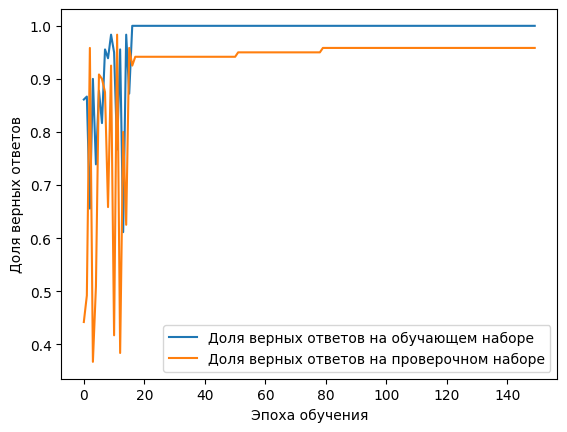

In [899]:
# Визуализируем изменение точности модели в ходе процесса обучения на графике

# Визуализация точности на обучающей выборке
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

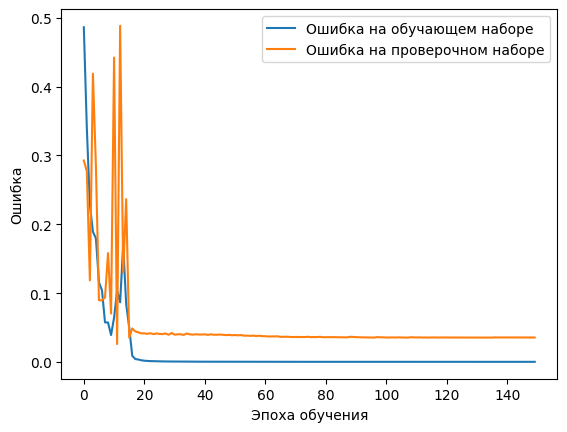

In [900]:
# Построим график изменения ошибки в ходе обучения

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()
plt.show()

In [901]:
# Предскажем значения целевого параметра получившейся моделью для обучающей выборки
y_predict_train = model.predict(X_train)

# Предскажем значения целевого параметра получившейся моделью для тестовой выборки
y_predict_test = model.predict(X_test)

7/7 [==============================] - 0s 646us/step


Метрики для тренировочной выборки:
Accuracy: 0.98
Precision: 0.62
Recall: 0.71
F1 score: 0.67
Метрики для тестовой выборки:
Accuracy: 0.97
Precision: 0.33
Recall: 0.25
F1 score: 0.29


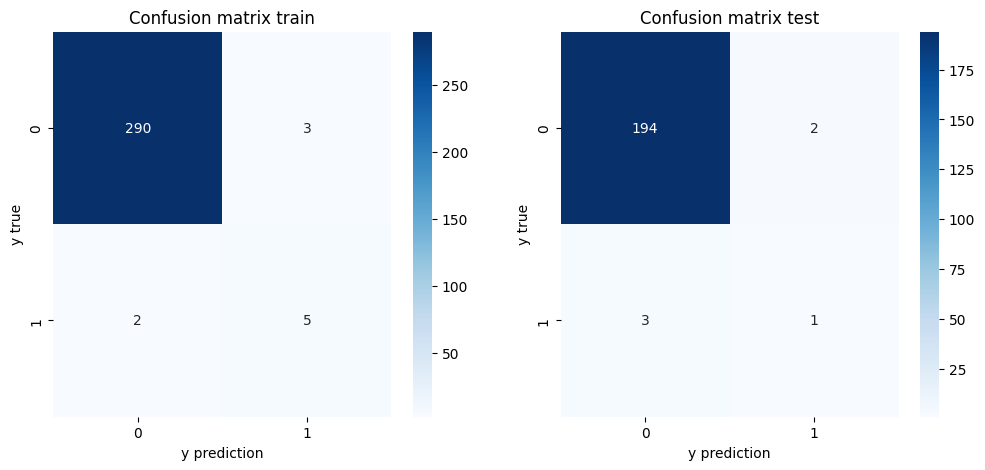

In [902]:
# Посчитаем метрики качества модели на основе получившихся предсказанных моделей


# Вычислим и выведем в графическом виде confusion matrix (матрицу ошибок)
from sklearn import metrics

confusion_matrix_train = metrics.confusion_matrix(y_train, y_predict_train.round())
confusion_matrix_test = metrics.confusion_matrix(y_test, y_predict_test.round())

import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix_test, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix test')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true')
sns.heatmap(confusion_matrix_train, annot=True, fmt='', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion matrix train')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')

# Рассчитаем и выведем числовые метрики
print("Метрики для тренировочной выборки:")
# Метрики для тренировочной выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_predict_train.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_train, y_predict_train.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_train, y_predict_train.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_predict_train.round())))

print("Метрики для тестовой выборки:")
# Метрики для тестовой выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_predict_test.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_predict_test.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_predict_test.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_test, y_predict_test.round())))

Модель, построенная на категориальных данных, уже смогла предсказать 1 положительный вердикт в отличие от прошлой модели и давала меньше ложноположительных результатов на тестовых данных.

----------------------------

### Построим одну общую модель

Создадим модель с двумя входами, принимающую одновременно и текстовые и категориальные данные.

In [903]:
from tensorflow import keras

# входной слой для категориальных данных
input_categorical = keras.layers.Input(shape=(X_cat.shape[1],))
dense_categorical = keras.layers.Dense(80, activation='relu')(input_categorical)

# входной слой для закодированных текстовых данных
input_embeddings = keras.layers.Input(shape=(200,))
dense_embeddings = keras.layers.Dense(64, activation='relu')(input_embeddings)

# соединим два входа
concatenated = keras.layers.Concatenate()([dense_categorical, dense_embeddings])

# добавим скрытых столбцов
hidden_layer1 = keras.layers.Dense(80, activation='relu')(concatenated)
hidden_layer2 = keras.layers.Dense(20, activation='relu')(hidden_layer1)
hidden_layer3 = keras.layers.Dense(10, activation='relu')(hidden_layer2)


# выходной слой
output = keras.layers.Dense(1, activation='sigmoid')(concatenated)


model = keras.models.Model(inputs=[input_categorical, input_embeddings], outputs=output)


# вычсчитаем весса для каждого их классов
class_weights = class_weight.compute_class_weight(class_weight ='balanced', classes = np.unique(y_train), y = y_train)

weight = {i : class_weights[i] for i in range(2)}

# Скомпилируем модель
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[ tf.keras.metrics.FalseNegatives(), 'accuracy'])

model.summary()


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 2880)]               0         []                            
                                                                                                  
 input_18 (InputLayer)       [(None, 200)]                0         []                            
                                                                                                  
 dense_144 (Dense)           (None, 80)                   230480    ['input_17[0][0]']            
                                                                                                  
 dense_145 (Dense)           (None, 64)                   12864     ['input_18[0][0]']            
                                                                                            

In [910]:
#  выделим обучающую и тестовую выборку
X_cat_train, X_cat_val, X_text_train, X_text_val, y_train, y_val = train_test_split(
    X_cat, X_text, y, test_size=0.3, stratify=y, random_state=42,)

In [911]:
# обучим модель
history = model.fit([X_cat_train, X_text_train], y_train, epochs=150, batch_size=32, validation_data=([X_cat_val, X_text_val], y_val), class_weight = weight)


Epoch 1/150
11/11 [==============================] - 0s 5ms/step - loss: 3.4384e-05 - false_negatives_40: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0105 - val_false_negatives_40: 2.0000 - val_accuracy: 0.9867
Epoch 2/150
11/11 [==============================] - 0s 3ms/step - loss: 3.3944e-05 - false_negatives_40: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0105 - val_false_negatives_40: 2.0000 - val_accuracy: 0.9867
Epoch 3/150
11/11 [==============================] - 0s 3ms/step - loss: 3.3473e-05 - false_negatives_40: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0105 - val_false_negatives_40: 2.0000 - val_accuracy: 0.9867
Epoch 4/150
11/11 [==============================] - 0s 3ms/step - loss: 3.2681e-05 - false_negatives_40: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0105 - val_false_negatives_40: 2.0000 - val_accuracy: 0.9867
Epoch 5/150
11/11 [==============================] - 0s 3ms/step - loss: 3.2249e-05 - false_negatives_40: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0105 -

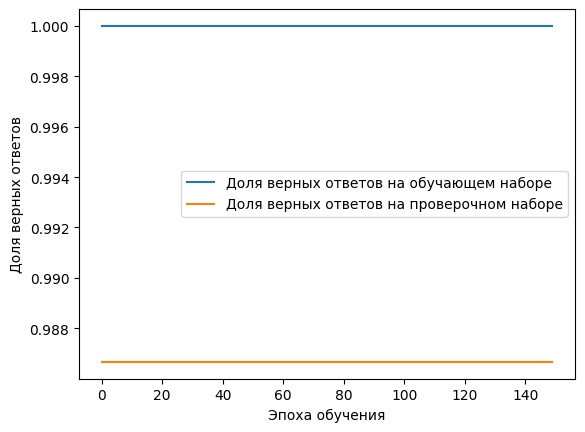

In [912]:
# Визуализируем изменение точности модели в ходе процесса обучения на графике

# Визуализация точности на обучающей выборке
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

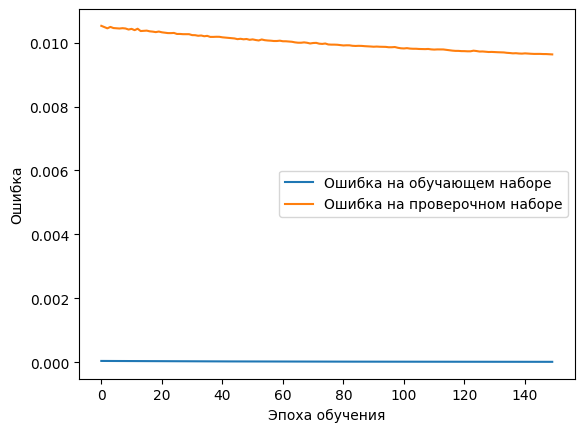

In [913]:
# отобразим изменение ошибки 
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()
plt.show()

In [914]:
# Предскажем значения целевого параметра получившейся моделью для обучающей выборки
y_predict_train = model.predict([X_cat_train, X_text_train])

# Предскажем значения целевого параметра получившейся моделью для тестовой выборки
y_predict_test = model.predict([X_cat_val, X_text_val])

5/5 [==============================] - 0s 721us/step


Метрики для тренировочной выборки:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00
Метрики для тестовой выборки:
Accuracy: 0.99
Precision: 1.00
Recall: 0.33
F1 score: 0.50


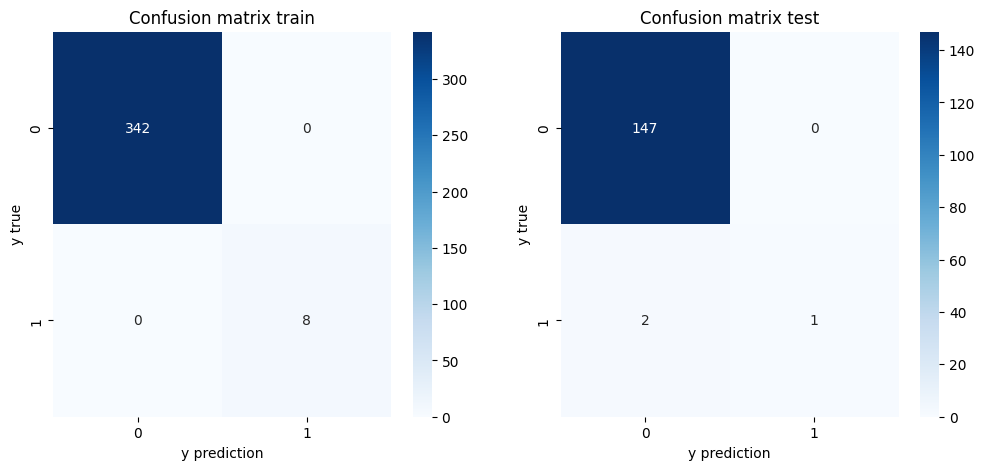

In [915]:
from sklearn import metrics

confusion_matrix_train = metrics.confusion_matrix(y_train, y_predict_train.round())
confusion_matrix_test = metrics.confusion_matrix(y_val, y_predict_test.round())

import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix_test, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix test')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true')
sns.heatmap(confusion_matrix_train, annot=True, fmt='', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion matrix train')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')

# Рассчитаем и выведем числовые метрики
print("Метрики для тренировочной выборки:")
# Метрики для тренировочной выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_predict_train.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_train, y_predict_train.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_train, y_predict_train.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_predict_train.round())))

print("Метрики для тестовой выборки:")
# Метрики для тестовой выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_val, y_predict_test.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_val, y_predict_test.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_val, y_predict_test.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_val, y_predict_test.round())))

Модель стала еще точнее: все так же предсказала один из тестовых положительных вердиктов, не давла ложноположительных результатов. И показала точность 98% (но данная величина в большей мере обучловлена несбалансированностью данных).

### Использование модели для прогноза на неразмеченных данных

In [916]:

# удалим столбец с целевыми данными, чтобы совпадала размерность с той, что ожитает модель
final_test_data_cat.drop(['Подходит - да/нет'], axis=1, inplace=True)
final_test_data_text.drop(['Подходит - да/нет'], axis=1, inplace=True)



In [917]:

# Предскажем значения целевого параметра для строк, для которых не не был определен
y_predict = model.predict([final_test_data_cat, final_test_data_text])


19/19 [==============================] - 0s 577us/step


### Дополнение исходного датасета столбцом с прогнозом

In [918]:
# в новый dataframe сохраним копию исходного файла
result_csv_predict = data

In [919]:
# определим функцию для расчета и форматирования величины, насколько подходит или не подходит кандидат
def calc_conclusion(arg):
  return '{:.2f}'.format(arg * 100) + ' / ' + '{:.2f}'.format(100 - arg * 100)

In [920]:
# выведем расчитанные знаечния в новый столбец

result_csv_predict['% подходит / % нет'] = y_predict
result_csv_predict['% подходит / % нет'] = result_csv_predict['% подходит / % нет'].fillna(0)
result_csv_predict['% подходит / % нет'] = result_csv_predict['% подходит / % нет'].apply(calc_conclusion)

In [783]:
# выведем результаты

result_csv_predict.head(50)

,Unnamed: 0,Дата отклика,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Обновление резюме,Подходит - да/нет,% подходит / % нет
0,0,2023-02-23 00:00:00,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,Маркетинговые исследования\nИсследование рынка...,NaN,Анализ рынка\nУправление проектами\nProduct Ma...,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да,99.09 / 0.91
1,1,2023-01-11 00:00:00,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,Участие в команде роста\nВ2В\n\nЗадачи:\n- Раз...,NaN,Самомотивация\nТаймменеджмент\nКреативность\nЧ...,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да,99.49 / 0.51
2,2,2023-02-27 00:00:00,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,,Запуск бренда и производства игристого кваса D...,"Чем бы я ни занимался с 2014 года, когда решил...",Продвижение бренда\nПланирование маркетинговых...,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да,99.29 / 0.71
3,3,2023-01-11 00:00:00,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),1. Исследование рынка\n2. Определение целевой ...,"Я проактивный, коммуникабельный, позитивный, д...",Управление проектами\nОрганизаторские навыки\n...,"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да,99.75 / 0.25
4,4,2023-01-11 00:00:00,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,Переговоры со стейкхолдером\n- Составление ТЗ...,Набрал кучу опыта и хочу с ним найти классную ...,Управление персоналом\nЗаключение договоров\nА...,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да,0.01 / 99.99
5,5,2023-02-25 00:00:00,"Женщина, 31 год, родилась 26 июня 1991",120 000 руб.,Product manager в Growth Hacking команду,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 11 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,NaN,NaN,NaN,"Высшее, 2014, Университет Российской академии ...",23 февраля 2023 в 16:46,да,0.00 / 100.00
6,6,2023-02-26 00:00:00,"Женщина, 36 лет, родилась 20 марта 1987",100 000 руб.,Директор медицинской клиники,"Уфа, Не готова к переезду, готова к редким ком...","полная занятость, частичная занятость, проектн...","полный день, гибкий график",Опыт работы —13 лет 9 месяцев,"ОАО ""Фармстандарт-УфаВИТА""",Начальник участка инъекционных препаратов,"Республика Башкортостан, Фармацевтическая прод...",NaN,Работа в команде\nОбучение персонала\nУправлен...,"Высшее, 2009, Башкирский государственный аграр...",9 марта 2023 в 22:27,да,99.21 / 0.79
7,7,2023-01-26 00:00:00,"Женщина, 24 года, родилась 27 апреля 1998",30 000 руб.,HR-специалист,"Уфа, Не готова к переезду, не готов

In [921]:
# расскоментируйте строку ниже, если нужно сохранить результат в файл
# result_csv_predict.to_csv('out_result.txt')

### Выводы

- Хотелось бы провалидировать модель на расширенном датасете.

- Несбалансированность исходных данных не дает возможности достоверно оценить качество модели. Есть риск, что при использовании этой модели для оценки кандидатов на другие вакансии, модель будет ошибаться.

- Важно подчеркнуть, что категориальные данные в моей работе кодируются по методу One Hot Encoding: для каждой новой категории в данных создается новый столбец и помечается единицей, если такая опция присутствует в исходных даных и нулем, если нет. При появлении новых городов в списке, новых навыков кандидатов и других подобных значений, размерность массива будет меняться и текущая медель будет к ним не применима. В этом случае нужно прогнать заново весь код по подготовке данных и обучить модели заново.

---------------------

### Дополнение

Проверим дополнительные гипотезы.

Первая: для того, чтобы зафиксировать размер входной матрицы для категориальных и данных вместо OneHotEncoding попробуем использовать FeautureHashing. Необходимо проверить? будет ли модель, обученная на этих данных давать показатели точности лучше, чем у модели, которую мы рассмотрели ранее.

In [1236]:
# Повторим шаги по подготовке данных
data = pd.read_excel('/Users/elenasokolova/Downloads/ДатаСет_Оценка_резюме_581_резюме_3_0_без_оценки.xlsx');

In [1237]:
# Удалим неиспользуемые данные
features = data.drop(['Дата отклика', 'Обновление резюме','Unnamed: 0', 'Обо мне', 'Выполняемые задачи на прошлых местах работ'],  axis=1).columns
data_hash = data[features]

In [1238]:
# Последовательно примерим фукции обработки к столбцам с категоридальными данными
data_hash['Пол'] = data_hash['Пол, возраст'].apply(extract_gender)
data_hash['Возраст'] = data_hash['Пол, возраст'].apply(extract_age)

# удалим ненужный столбец
data_hash.drop(['Пол, возраст'], axis=1, inplace=True)

/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/1062050200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hash['Пол'] = data_hash['Пол, возраст'].apply(extract_gender)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/1062050200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hash['Возраст'] = data_hash['Пол, возраст'].apply(extract_age)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/1062050200.py:6: SettingWithCopyWarning: 
A value is try

In [1239]:
data_hash['Образование'] = data_hash['Образование и ВУЗ'].apply(get_education_level)
data_hash.drop(['Образование и ВУЗ'], axis=1, inplace=True)

/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/2184245308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hash['Образование'] = data_hash['Образование и ВУЗ'].apply(get_education_level)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/2184245308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hash.drop(['Образование и ВУЗ'], axis=1, inplace=True)


высшее                383
среднееспециальное     58
бакалавр               43
магистр                40
неоконченноевысшее     33
среднее                16
кандидатнаук            5
докторнаук              1
Name: Образование, dtype: int64

In [1240]:
# создадим новый столбец с опытом работы в месяцах
data_hash['Опыт работы (месяц)'] = data_hash['Опыт ()'].apply(get_experience)
# удалим ненужный столбнц
data_hash.drop(['Опыт ()'], axis=1, inplace=True)

/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/2018475364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hash['Опыт работы (месяц)'] = data_hash['Опыт ()'].apply(get_experience)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/2018475364.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hash.drop(['Опыт ()'], axis=1, inplace=True)


In [1241]:
# для каждого из возможных типов занятости создадим свой столбец и проставим 1, если кандидат рассматривает такой вариант и 0, если нет
data_hash['полная занятость'] = data_hash['Занятость'].apply(is_full_employment)
data_hash['частичная занятость'] = data_hash['Занятость'].apply(is_part_employment)
data_hash['проектная работа'] = data_hash['Занятость'].apply(is_project)
data_hash['волонтёрство'] = data_hash['Занятость'].apply(is_volunteer)
data_hash['стажировка'] = data_hash['Занятость'].apply(is_intern)


# для каждого из возможных типов рабочего графика создадим свой столбец и проставим 1, если кандидат рассматривает такой вариант и 0, если нет
data_hash['полный день'] = data_hash['График'].apply(is_full_time)
data_hash['сменный график'] = data_hash['График'].apply(is_shift_schedule)
data_hash['гибкий график'] = data_hash['График'].apply(is_flexible_schedule)
data_hash['удалённая работа'] = data_hash['График'].apply(is_remote_work)
data_hash['вахтовый метод'] = data_hash['График'].apply(is_shift_method)

# удалим старые столбцы
data_hash.drop(['Занятость'], axis=1, inplace=True)
data_hash.drop(['График'], axis=1, inplace=True)

/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/2268129148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hash['полная занятость'] = data_hash['Занятость'].apply(is_full_employment)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/2268129148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hash['частичная занятость'] = data_hash['Занятость'].apply(is_part_employment)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/2268129148.py:4: SettingWi

In [1242]:

# выделим данные о готовности соискателя к командировкам и переезду в отдельные столбцы
data_hash['Готовность к переезду'] = data_hash['Город'].apply(get_ready_for_relocation)
data_hash['Готовность к командировкам'] = data_hash['Город'].apply(get_ready_for_businessTrips)

# переопределим значение столбца "город"
# городом соискателя
data_hash['Город'] = data_hash['Город'].apply(get_city)

In [1243]:
data_hash['ЗП'] = data_hash['ЗП'].apply(get_salary)

In [1244]:
data_hash['Ключевые навыки'] = data_hash['Ключевые навыки'].str.replace('\n', ';')

In [1245]:
data_hash.head(5)

,ЗП,Ищет работу на должность,Город,Последнее/нынешное место работы,Последняя/нынешняя должность,Ключевые навыки,Подходит - да/нет,Пол,Возраст,Образование,...,проектная работа,волонтёрство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,Готовность к переезду,Готовность к командировкам
0,0.09,Growth Product Manager,Индонезия,PT MYBALI APP GROUP,Менеджер по продукту,Анализ рынка;Управление проектами;Product Mana...,да,0,0,высшее,...,1,0,0,0,0,0,1,0,0,0
1,0.00,Growth Product Manager,Москва,Банк Открытие,Product owner трайб сбережения и инвестиции,Самомотивация;Таймменеджмент;Креативность;Чувс...,да,0,0,высшее,...,0,0,0,1,0,1,1,0,1,1
2,0.15,Growth Product Manager,Санкт-Петербург,DIKIY LLC,,Продвижение бренда;Планирование маркетинговых ...,да,1,33,высшее,...,1,0,0,1,0,1,1,0,1,1
3,0.00,Growth Product Manager,Москва,WeInvest,Product Manager (team leader),Управление проектами;Организаторские навыки;Пр...,да,1,32,магистр,...,0,0,1,1,0,1,1,0,1,1
4,0.15,Growth Product Manager,Пермь,Индивидуальное предпринимательство / частная п...,Product/Project manager,Управление персоналом;Заключение договоров;Ана...,да,1,26,высшее,...,1,0,0,1,0,1,1,0,1,1


In [1246]:
for_hash = data_hash[['Ищет работу на должность', 'Город', 'Последнее/нынешное место работы', 'Последняя/нынешняя должность', 'Ключевые навыки', 'Образование']]

In [1247]:
for_hash.head()

,Ищет работу на должность,Город,Последнее/нынешное место работы,Последняя/нынешняя должность,Ключевые навыки,Образование
0,Growth Product Manager,Индонезия,PT MYBALI APP GROUP,Менеджер по продукту,Анализ рынка;Управление проектами;Product Mana...,высшее
1,Growth Product Manager,Москва,Банк Открытие,Product owner трайб сбережения и инвестиции,Самомотивация;Таймменеджмент;Креативность;Чувс...,высшее
2,Growth Product Manager,Санкт-Петербург,DIKIY LLC,,Продвижение бренда;Планирование маркетинговых ...,высшее
3,Growth Product Manager,Москва,WeInvest,Product Manager (team leader),Управление проектами;Организаторские навыки;Пр...,магистр
4,Growth Product Manager,Пермь,Индивидуальное предпринимательство / частная п...,Product/Project manager,Управление персоналом;Заключение договоров;Ана...,высшее


In [1248]:
from sklearn.feature_extraction import FeatureHasher

In [1249]:
position_data = [[position] for position in for_hash['Ищет работу на должность']]

# Initialize FeatureHasher
hasher = FeatureHasher(n_features=12, input_type='string')

# Apply feature hashing to the color data
hashed_features = hasher.transform(position_data)

# Convert the hashed features to a dense array
hashed_features = hashed_features.toarray()

# Create a new DataFrame with the hashed features
hashed_df1 = pd.DataFrame(hashed_features, columns=['hashed_feature1_' + str(i) for i in range(12)])

# Print the resulting DataFrame
print(hashed_df1)

     hashed_feature1_0  hashed_feature1_1  hashed_feature1_2  \
0                  0.0                0.0                0.0   
1                  0.0                0.0                0.0   
2                  0.0                0.0                0.0   
3                  0.0                0.0                0.0   
4                  0.0                0.0                0.0   
..                 ...                ...                ...   
574                0.0                0.0                0.0   
575                0.0                0.0                0.0   
576                0.0                0.0                0.0   
577                0.0                0.0                0.0   
578               -1.0                0.0                0.0   

     hashed_feature1_3  hashed_feature1_4  hashed_feature1_5  \
0                  0.0                0.0                0.0   
1                  0.0                0.0                0.0   
2                  0.0                0

In [1250]:



position_data = [[position] for position in for_hash['Ищет работу на должность']]
hasher = FeatureHasher(n_features=12, input_type='string')
hashed_features = hasher.transform(position_data)
hashed_df1 = pd.DataFrame(hashed_features.toarray(), columns=['hashed_feature1_' + str(i) for i in range(12)])

position_data = [[position] for position in for_hash['Город']]
hasher = FeatureHasher(n_features=12, input_type='string')
hashed_features = hasher.transform(position_data)
hashed_df2 = pd.DataFrame(hashed_features.toarray(), columns=['hashed_feature2_' + str(i) for i in range(12)])


position_data = [[position] for position in for_hash['Последнее/нынешное место работы']]
hasher = FeatureHasher(n_features=12, input_type='string')
hashed_features = hasher.transform(position_data)
hashed_df3 = pd.DataFrame(hashed_features.toarray(), columns=['hashed_feature3_' + str(i) for i in range(12)])

position_data = [[position] for position in for_hash['Последняя/нынешняя должность']]
hasher = FeatureHasher(n_features=12, input_type='string')
hashed_features = hasher.transform(position_data)
hashed_df4 = pd.DataFrame(hashed_features.toarray(), columns=['hashed_feature4_' + str(i) for i in range(12)])


In [1251]:
for_hash['Ключевые навыки'] = for_hash['Ключевые навыки'].str.split(';').fillna('')

hasher = FeatureHasher(n_features=12, input_type='string')
hashed_features = hasher.transform(for_hash['Ключевые навыки'])
hashed_df5 = pd.DataFrame(hashed_features.toarray(), columns=['hashed_feature5_' + str(i) for i in range(12)])

position_data = [[position] for position in for_hash['Образование']]
hasher = FeatureHasher(n_features=12, input_type='string')
hashed_features = hasher.transform(position_data)
hashed_df6 = pd.DataFrame(hashed_features.toarray(), columns=['hashed_feature6_' + str(i) for i in range(12)])




/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_32706/3697825870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_hash['Ключевые навыки'] = for_hash['Ключевые навыки'].str.split(';').fillna('')


In [1162]:
data_hash.drop(columns=['Ищет работу на должность', 'Город', 'Последнее/нынешное место работы', 'Последняя/нынешняя должность', 'Ключевые навыки', 'Образование'], inplace=True)

In [1164]:
data_hash = pd.concat([data_hash, hashed_df1, hashed_df2, hashed_df3, hashed_df4, hashed_df5, hashed_df6], axis=1)

In [1165]:
data_hash = data_hash.dropna(subset=['Подходит - да/нет'])

In [1166]:
data_hash['Подходит - да/нет'] = data_hash['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)

In [1168]:
data_hash.head()

,ЗП,Подходит - да/нет,Пол,Возраст,Опыт работы (месяц),полная занятость,частичная занятость,проектная работа,волонтёрство,стажировка,...,hashed_feature6_2,hashed_feature6_3,hashed_feature6_4,hashed_feature6_5,hashed_feature6_6,hashed_feature6_7,hashed_feature6_8,hashed_feature6_9,hashed_feature6_10,hashed_feature6_11
0,0.09,1,0,0,70,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.00,1,0,0,143,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.15,1,1,33,86,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.00,1,1,32,106,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.15,1,1,26,69,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [1169]:
# Выделим целевой показатель в отдельное множество и удалим его из множества входных параметров
features = data_hash.drop('Подходит - да/нет', axis=1).columns
X_cat1, y = data_hash[features], data_hash['Подходит - да/нет']


In [1170]:
# Выделим обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_cat1, y, test_size=0.4, random_state=42, stratify=y)

# Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (300, 88) (300,)
Test: (200, 88) (200,)


In [1177]:
# Создадим последовательную модель из 3 полносвязный слоев (80 - 20 - 1 нейрон)
model = Sequential()


model.add(Dense(80, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Calculate class weights to address the class imbalance
class_weights = class_weight.compute_class_weight(class_weight ='balanced', classes = np.unique(y_train), y = y_train)

weight = {i : class_weights[i] for i in range(2)}

# Скомпилируем модель
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[ tf.keras.metrics.FalseNegatives(), 'accuracy'])

# и выведем ее аржитектуру
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 80)                7120      
                                                                 
 dense_166 (Dense)           (None, 40)                3240      
                                                                 
 dense_167 (Dense)           (None, 20)                820       
                                                                 
 dense_168 (Dense)           (None, 1)                 21        
                                                                 
Total params: 11201 (43.75 KB)
Trainable params: 11201 (43.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1178]:
# Провердем обучение нейронной сети
history = model.fit(X_train,     # Обучающая выборка параметров
          y_train,               # Обучающая выборка меток класса
          batch_size=8,          # Размер батча (пакета)
          epochs=150,            # Количество эпох обучения
          validation_split=0.4,  # Доля проверочной выборки
          verbose=1,
          class_weight = weight)   

Epoch 1/150
23/23 [==============================] - 0s 5ms/step - loss: 0.3659 - false_negatives_46: 5.0000 - accuracy: 0.7056 - val_loss: 0.5317 - val_false_negatives_46: 0.0000e+00 - val_accuracy: 0.1500
Epoch 2/150
23/23 [==============================] - 0s 1ms/step - loss: 0.3550 - false_negatives_46: 0.0000e+00 - accuracy: 0.0944 - val_loss: 0.3580 - val_false_negatives_46: 1.0000 - val_accuracy: 0.3667
Epoch 3/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3764 - false_negatives_46: 4.0000 - accuracy: 0.6833 - val_loss: 0.6157 - val_false_negatives_46: 0.0000e+00 - val_accuracy: 0.1667
Epoch 4/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3042 - false_negatives_46: 1.0000 - accuracy: 0.4667 - val_loss: 0.0453 - val_false_negatives_46: 2.0000 - val_accuracy: 0.9417
Epoch 5/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3628 - false_negatives_46: 4.0000 - accuracy: 0.7167 - val_loss: 0.7546 - val_false_negatives_46: 0.0

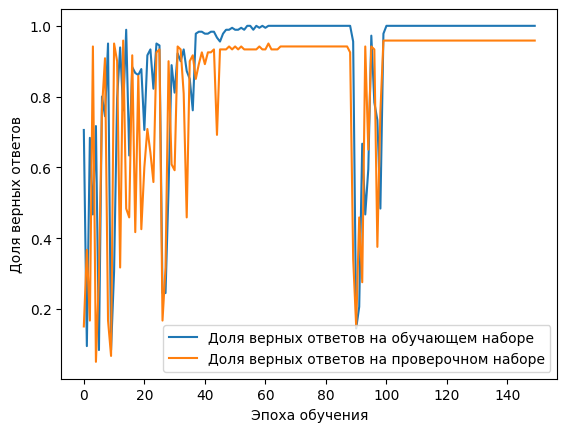

In [1179]:
# Визуализируем изменение точности модели в ходе процесса обучения на графике

# Визуализация точности на обучающей выборке
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

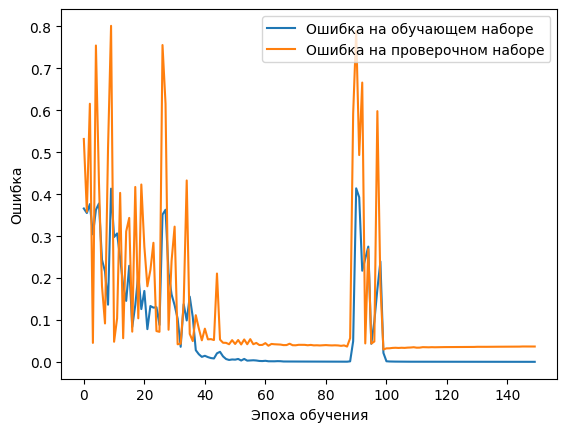

In [1180]:
# отобразим изменение ошибки 
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()
plt.show()

In [1181]:
# Предскажем значения целевого параметра получившейся моделью для обучающей выборки
y_predict_train = model.predict([X_train])

# Предскажем значения целевого параметра получившейся моделью для тестовой выборки
y_predict_test = model.predict([X_test])

7/7 [==============================] - 0s 500us/step


Метрики для тренировочной выборки:
Accuracy: 0.98
Precision: 0.62
Recall: 0.71
F1 score: 0.67
Метрики для тестовой выборки:
Accuracy: 0.96
Precision: 0.00
Recall: 0.00
F1 score: 0.00


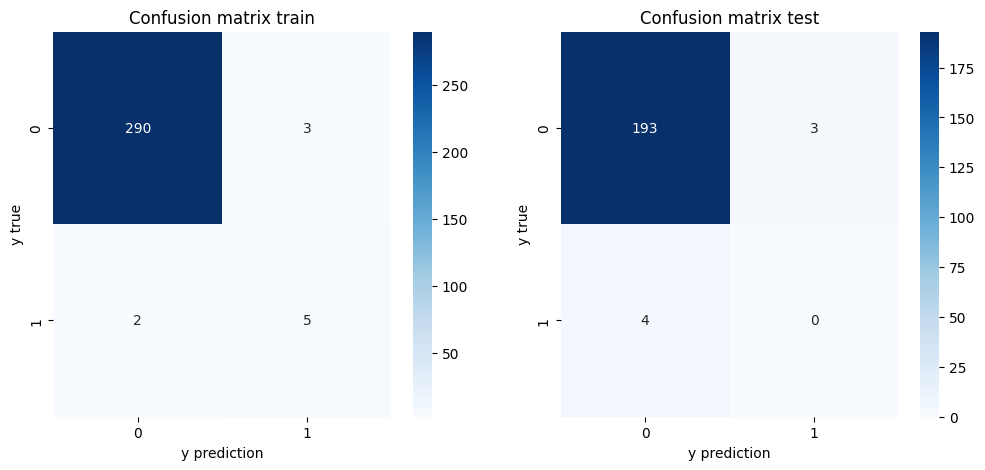

In [1182]:
from sklearn import metrics

confusion_matrix_train = metrics.confusion_matrix(y_train, y_predict_train.round())
confusion_matrix_test = metrics.confusion_matrix(y_test, y_predict_test.round())

import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix_test, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix test')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true')
sns.heatmap(confusion_matrix_train, annot=True, fmt='', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion matrix train')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')

# Рассчитаем и выведем числовые метрики
print("Метрики для тренировочной выборки:")
# Метрики для тренировочной выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_predict_train.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_train, y_predict_train.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_train, y_predict_train.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_predict_train.round())))

print("Метрики для тестовой выборки:")
# Метрики для тестовой выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_predict_test.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_predict_test.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_predict_test.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_test, y_predict_test.round())))

Вывод: использование хеширования для кодирования категориальных признаков хоть и решает проблему нефиксированной размерности модели. но ухудшает прогнозирование модели. На хешированных данных модель хуже находит корреляции между входными данными и целевой переменной.

Проверим вторую гипотезу: можно ли улучшить качество модели с использованием хешированных данных, если подобрать ее топологию с использованием autokeras?

In [1184]:
## %pip install git+https://github.com/keras-team/keras-tuner.git
## %pip install autokeras


  Cloning https://github.com/keras-team/keras-tuner.git to /private/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/pip-req-build-y1t427zq
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-tuner.git /private/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/pip-req-build-y1t427zq
  Resolved https://github.com/keras-team/keras-tuner.git to commit 4709e4b41b53abe7b16348d56a40259029790762
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for keras-tuner: filename=keras_tuner-1.3.5-py3-none-any.whl size=176100 sha256=e6ec48a29a5b7878b78944a59d70d33396a6b00b148928d4ac47dd59658f984e
  Stored in directory: /private/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/pip-ephem-wheel-cache-abbtoyrg/wheels/df/77/a5/41f956e3b22fca2fae83432e8c2a884d77644b63c06896aa00
Successfully built keras-tuner

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[noti

In [1207]:
import autokeras as ak
import tensorflow as tf


# проинициализируем AutoKeras Classifier
clf = ak.StructuredDataClassifier(
    overwrite=True,
    max_trials=50,
    objective='val_accuracy',
    directory='auto_model',
)

# будем искать модель оптимальной топологии
clf.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# сохраним лучшую модель 
best_model = clf.export_model()
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# оценим качество лучшей подобованной модели на тестовом наборе даных
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Trial 44 Complete [00h 00m 08s]
val_accuracy: 0.9800000190734863

Best val_accuracy So Far: 0.9900000095367432
Total elapsed time: 04h 17m 30s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/20
10/10 [==============================] - 1s 39ms/step - loss: 0.9981 - accuracy: 0.4600 - val_loss: 0.8157 - val_accuracy: 0.1650
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 0.9115 - accuracy: 0.5000 - val_loss: 0.7376 - val_accuracy: 0.4300
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 0.7439 - accuracy: 0.6200 - val_loss: 0.6505 - val_accuracy: 0.6700
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 0.7049 - accuracy: 0.6300 - val_loss: 0.5762 - val_accuracy: 0.8650
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 0.6151 - accuracy: 0.6833 - val_loss: 0.5344 - val_accuracy: 0.9050
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 0.5773 - accuracy: 0.7067 - val_loss: 0.4865 - val_accuracy: 0.9350
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 0.4794 - accuracy: 0.7467 - val_loss: 0.4252 - val_accuracy: 0.9700
Epoch 8/20
10/10 [=

INFO:tensorflow:Assets written to: auto_model/structured_data_classifier/best_model/assets


7/7 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9850
Test Loss: 0.1948
Test Accuracy: 0.9850


In [1208]:
# выведем топологию выбранной модели
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 88)]              0         
                                                                 
 multi_category_encoding (M  (None, 88)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 88)                177       
 on)                                                             
                                                                 
 dense (Dense)               (None, 1024)              91136     
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                             

In [1210]:
# Предскажем значения целевого параметра получившейся моделью для обучающей выборки
y_predict_train = best_model.predict([X_train])

# Предскажем значения целевого параметра получившейся моделью для тестовой выборки
y_predict_test = best_model.predict([X_test])

7/7 [==============================] - 0s 2ms/step


Метрики для тренировочной выборки:
Accuracy: 0.99
Precision: 1.00
Recall: 0.57
F1 score: 0.73
Метрики для тестовой выборки:
Accuracy: 0.98
Precision: 1.00
Recall: 0.25
F1 score: 0.40


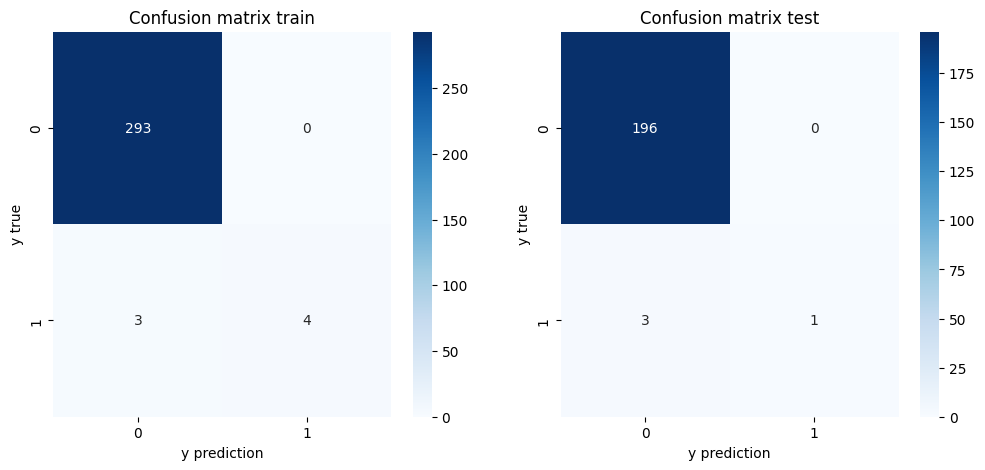

In [1211]:
from sklearn import metrics

confusion_matrix_train = metrics.confusion_matrix(y_train, y_predict_train.round())
confusion_matrix_test = metrics.confusion_matrix(y_test, y_predict_test.round())

import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix_test, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix test')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true')
sns.heatmap(confusion_matrix_train, annot=True, fmt='', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion matrix train')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')

# Рассчитаем и выведем числовые метрики
print("Метрики для тренировочной выборки:")
# Метрики для тренировочной выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_predict_train.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_train, y_predict_train.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_train, y_predict_train.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_predict_train.round())))

print("Метрики для тестовой выборки:")
# Метрики для тестовой выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_predict_test.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_predict_test.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_predict_test.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_test, y_predict_test.round())))

По графикам выше видно, что усложнение топологии модели и подбор ее с использованием спецаильного инструментария существенным образом не улучшил качество предсказания на представленных данных. Все так же у модели нет проблем с предсказанием отрицательных вердиктов по сотрудникам, но все так же она делает много ошибок на данных, относящихся к положительной категории.

На основании всех экспериментов, представленных выше, можно сделать вывод, что на имеющемся наборе данных невозможно существенно улучшить модель, чтобы она адекватно справлялась с потавленной задачей.